<a href="https://colab.research.google.com/github/toraaglobal/Case_Studies/blob/master/UsingBayesToClassify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Toy problem based on SKLEARN wine dataset

In [0]:
import sklearn
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score


In [0]:
# OBTAIN

data = load_wine()

In [4]:
data

{'DESCR': '.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:           

In [0]:
# SCRUB

label_names = data['target_names']
labels = data['target']
feature_names = data['feature_names']
features = data['data']

In [6]:
# EXPLORE

print(label_names)


['class_0' 'class_1' 'class_2']


In [0]:
# MODEL


# Split our data
train, test, train_labels, test_labels = train_test_split(features,labels,test_size=0.50, random_state=42)


In [0]:
# MODEL

# Initialize our classifier
gnb = GaussianNB()

# Train our classifier
model = gnb.fit(train, train_labels)

In [9]:
# MODEL

# Make predictions
preds = gnb.predict(test)
print(preds)

[0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0 2
 2 1 2 0 1 1 1 2 0 1 1 2 0 1 0 0 2 2 1 1 0 1 0 2 1 1 2 0 0 0 2 0 0 1 2 1 0
 2 1 0 2 1 1 0 1 0 0 1 1 0 2 1]


In [0]:
# MODEL

# Evaluate accuracy
print(accuracy_score(test_labels, preds))

0.9887640449438202


In [10]:
expected = test_labels
predicted = preds
print(sklearn.metrics.confusion_matrix(expected, predicted))

[[32  1  0]
 [ 0 34  0]
 [ 0  0 22]]


**Yellowbricks for model evaluation**

In [0]:
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from yellowbrick.classifier import ClassificationReport


def visual_model_selection(X, y, estimator):
    """
    Test various estimators.
    """
    model = estimator.fit(X,y)

    # Create a new figure to draw the classification report on
    _, ax = plt.subplots()

    # Instantiate the classification model and visualizer
    visualizer = ClassificationReport(
        model, ax=ax, classes= label_names
    )
    visualizer.fit(X, y)
    visualizer.score(X, y)

    # Note that to save the figure to disk, you can specify an outpath
    # argument to the poof method!
    visualizer.poof()

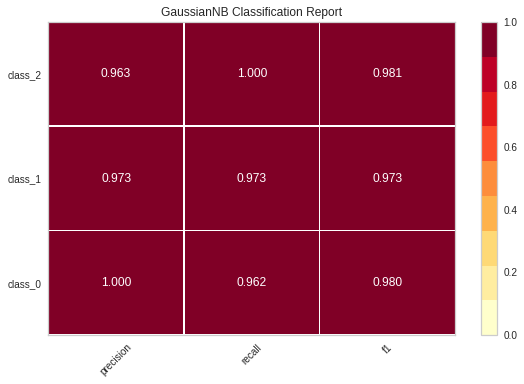

In [12]:
 visual_model_selection(train, train_labels,  GaussianNB())

In [0]:
def visual_model_prediction(X, y, estimator):
    """
    Test various estimators.
    """

    # Create a new figure to draw the classification report on
    _, ax = plt.subplots()

    # Instantiate the classification model and visualizer
    visualizer = ClassificationReport(
        estimator, ax=ax, classes= label_names
    )
    visualizer.fit(X, y)
    visualizer.score(X, y)

    # Note that to save the figure to disk, you can specify an outpath
    # argument to the poof method!
    visualizer.poof()

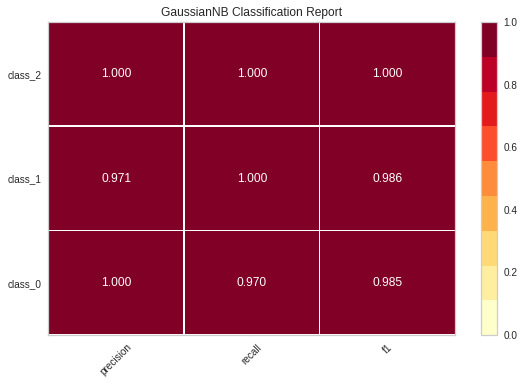

In [14]:
visual_model_prediction(test, test_labels, gnb)
    